Accuracy: 0.7422157856625634
F1 Score: 0.7569966795950217
Total entries after removing NA values and filtering: 5524


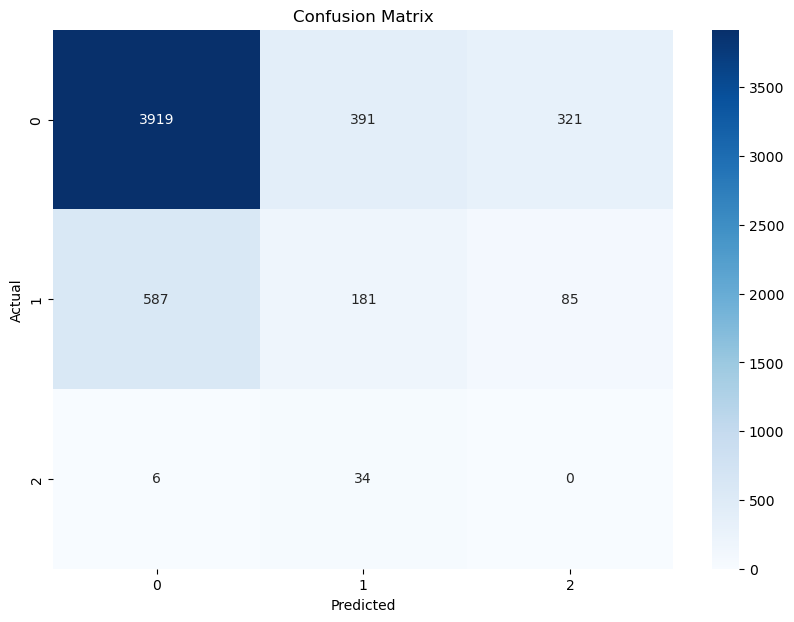

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pandas as pd
import numpy as np
import re

big_frame = pd.read_csv('GPT-3-Dataset.csv')

# Copy the big_frame DataFrame
df = big_frame.copy()

decision_mapping = {
    'included': 0,
    'rejected': 1,
    'not sure': 2
}

# Remove rows with NA values
df = df.dropna(subset=['Decision', 'Decision_Predicted'])

df['Decision'] = df['Decision'].astype(int)

# Convert 'Decision_Predicted' column to strings
df['Decision_Predicted'] = df['Decision_Predicted'].astype(str)

# Extract numeric part from 'Decision_Predicted' column
df['Decision_Predicted'] = df['Decision_Predicted'].apply(lambda x: re.findall('\d+', x)[0] if re.findall('\d+', x) else '-1')
df['Decision_Predicted'] = df['Decision_Predicted'].astype(int)

# Filter out entries where Decision_Predicted is not in [0, 1, 2]
df = df[df['Decision_Predicted'].isin([0, 1, 2])]

# Get unique classes in the 'Decision' column
labels = np.unique(df[['Decision', 'Decision_Predicted']])

# Generate the confusion matrix
cm = confusion_matrix(df['Decision'], df['Decision_Predicted'], labels=labels)

accuracy = accuracy_score(df['Decision'], df['Decision_Predicted'])
f1 = f1_score(df['Decision'], df['Decision_Predicted'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Total entries after removing NA values and filtering: {len(df)}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
